# R-CNN

### 개요
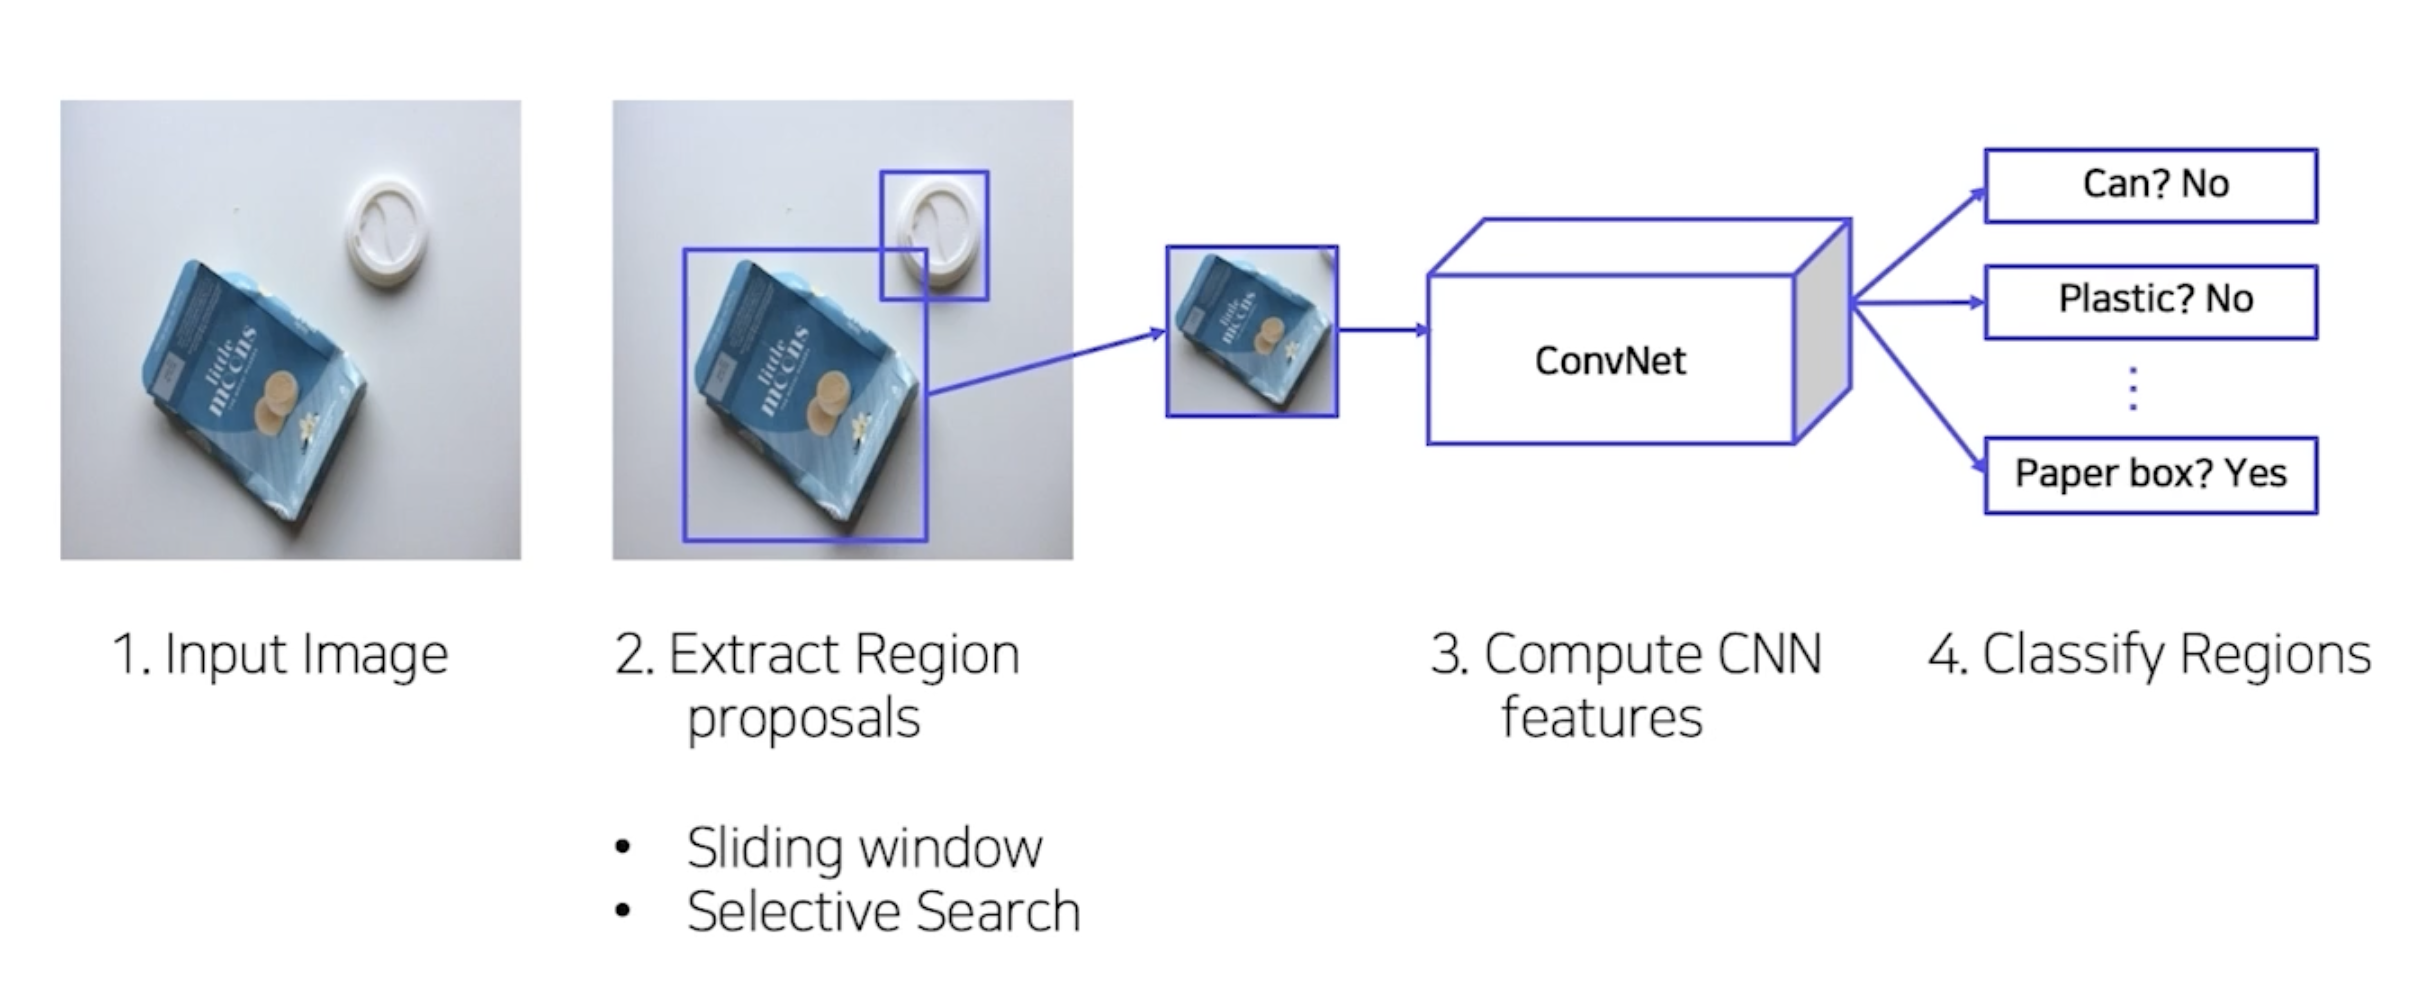

### 특징
- 2000개의 Region을 각각 CNN 통과
- 강제 Wraping, 성능 하락 가능성
- CNN, SVM classifier, Bounding Box Regressor 따로 학습
- End-to-End(x)

### Extract Region proposals

##### Sliding Window
- 배경이 많이 검출되는 문제가 존재
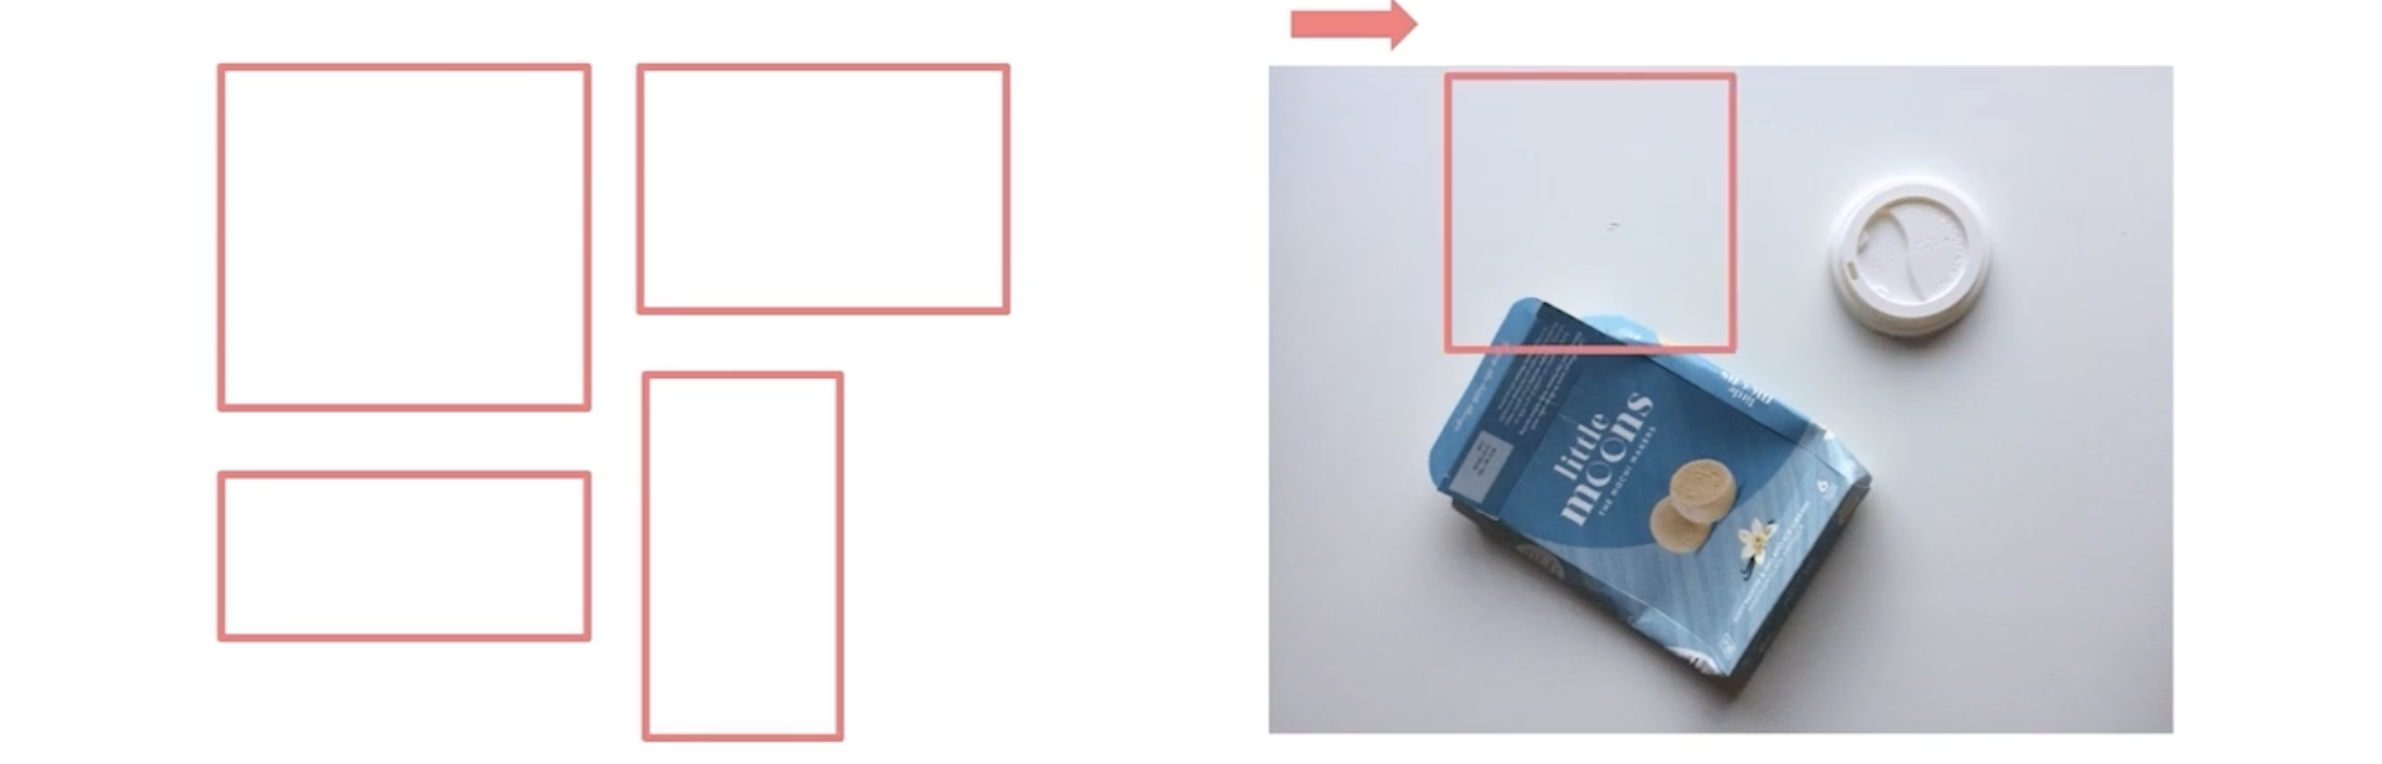

##### [Selective Search](https://m.blog.naver.com/laonple/220918802749)
- 이미지의 특성(질감, shape)을 활용해서 무수히 많은 작은 영역으로 나눈 후 점점 합쳐가는 방식
- [영역 병합](https://m.blog.naver.com/PostView.naver?blogId=laonple&logNo=220930954658&proxyReferer=)
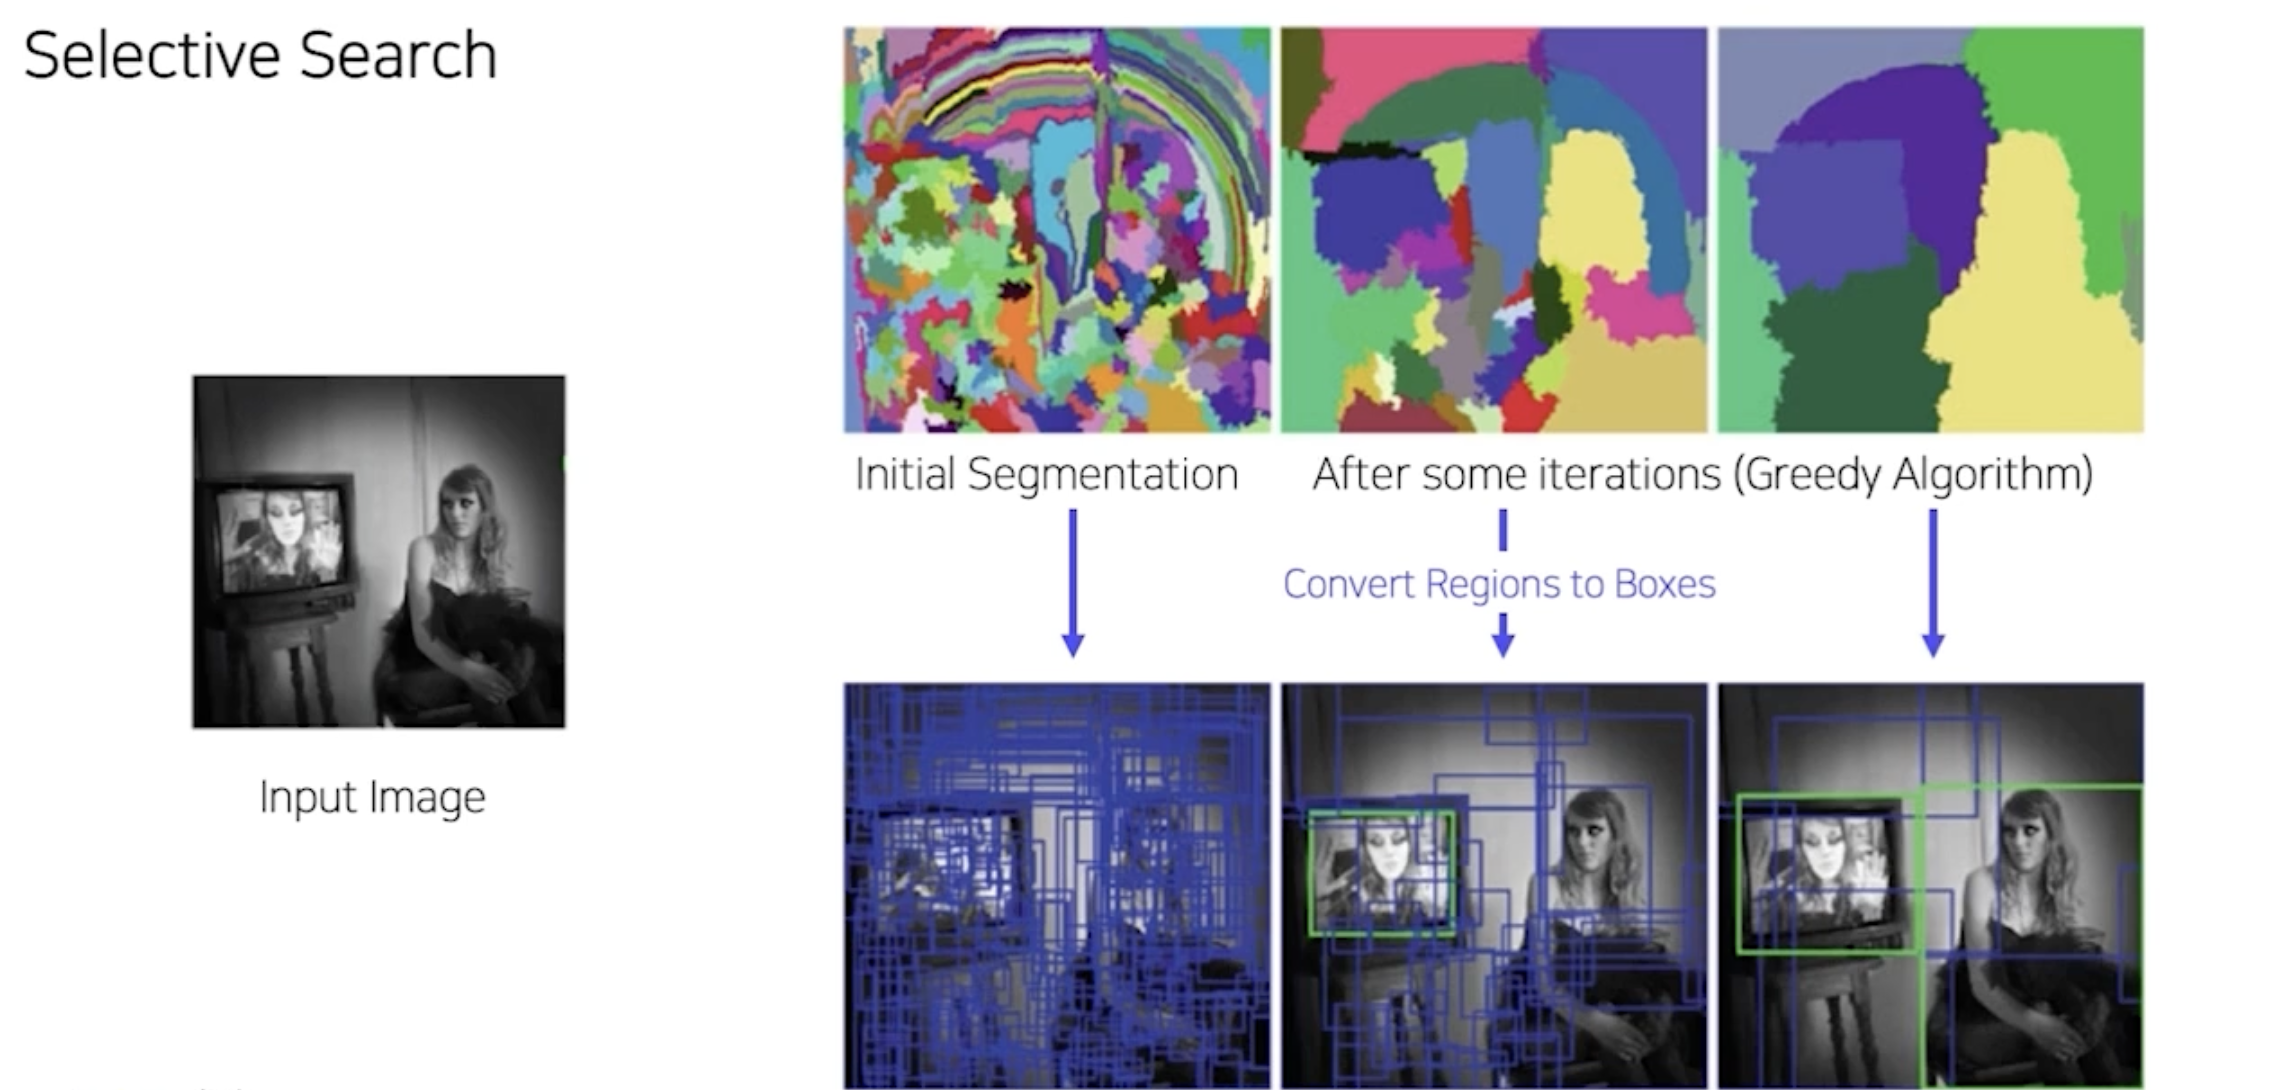

### Pipeline
1) 입력 이미지 받기
2) Selective Search를 통햏 2000개의 RoI(Region of Interest) 추출
3) RoI의 크기를 조절해 모두 동일한 사이즈로 변경: CNN의 마지막 FCL의 입력 사이즈가 고정이므로
4) RoI를 CNN에 넣어 Feature 추출
  - 각 region마다 4096-dim feature vector 추출(2000x4096)
  - Pretrained AlexNet 구조 활용: AlexNet 마지막에 FC layer 활용
5) CNN을 통해 나온 feature를 학습
    1) CNN을 통해 나온 feature를 SVM에 넣어 분류 진행
        - Class(클래스 개수 + 배경 개수) + Confidence score
    2) CNN을 통해 나온 feature를 regression을 통해 bounding box 예측  

### Training
- AlexNet
  - Domain Specific Finetunning
  - Dataset 구성: IoU>0.5(Positive), IoU<0.5(Negative), Positive(32), Negative(96)
- Linear SVM
  - Dataset 구성: Ground Truth(Positive), IoU<0.3(Negative), Positive(32), Negative(96)
  - Hard Negative Mining: 배경으로 식별하기 어려운 Sample들을 강제로 다음 배치의 Negative Sample로 mining하는 방법. Hard Negative(False Positive)
- Bounding Box Regressor
  - Dataset 구성: IoU>0.6(positive)
  - Loss Function: MSE Loss